# Superheros - Marvel vs. DC comics

In this notebook I have very briefly looked at the data and visualized some statistics. It is mostly comparisons between the superheros from DC comics and the superheros from Marvel. 

It was a very funny and interesting, and with more time I would like to explore the data more.

## Import packages that we will need

In [28]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## The Data

### Read in the data

In [29]:
dc_superdata = pd.read_csv('./dc-wikia-data.csv')
marvel_superdata = pd.read_csv('./marvel-wikia-data.csv')

### Short about the data

Source: https://github.com/fivethirtyeight/data/tree/master/comic-characters

The data contains information about superheros in the DC Universe and the Marvel Universe. 

The data is divided into 2 csv-files, one per universe.

Both files contrain following columns:
1. page_id = The unique identifier for that characters page within the wikia
2. name	= The name of the character
3. urlslug = The unique url within the wikia that takes you to the character
4. ID = The identity status of the character (Secret Identity, Public identity, [on marvel only: No Dual Identity])
5. ALIGN = If the character is Good, Bad or Neutral
6. EYE = Eye color of the character
7. HAIR = Hair color of the character
8. SEX = Sex of the character (e.g. Male, Female, etc.)
9. GSM = If the character is a gender or sexual minority (e.g. Homosexual characters, bisexual characters)
10. ALIVE = If the character is alive or deceased
11. APPEARANCES = The number of appareances of the character in comic books (as of Sep. 2, 2014.)
12. FIRST APPEARANCE = The month and year of the character's first appearance in a comic book, if available
13. YEAR = The year of the character's first appearance in a comic book, if available

### What is the analysis goal?
Compair DC and Marvel<BR />
Look at the data and visualize the different statistics.

### Tweek tha data if needed and make charts

#### DC

In [30]:
dc_superdata.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [31]:
dc_superdata.isnull().sum()

page_id                0
name                   0
urlslug                0
ID                  2013
ALIGN                601
EYE                 3628
HAIR                2274
SEX                  125
GSM                 6832
ALIVE                  3
APPEARANCES          355
FIRST APPEARANCE      69
YEAR                  69
dtype: int64

*We have some missing values, we have to handle that when/if we are using that column.*

In [32]:
# When did the first Superhero appear
dc_superdata['YEAR'].min()

1935.0

In [33]:
# What year was most Superheros introduced
introduction1 = dc_superdata['YEAR'].value_counts()
introduction1.head()

2006.0    303
1988.0    286
2010.0    279
1989.0    266
1987.0    254
Name: YEAR, dtype: int64

#### Marvel

In [34]:
marvel_superdata.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [35]:
marvel_superdata.isnull().sum()

page_id                 0
name                    0
urlslug                 0
ID                   3770
ALIGN                2812
EYE                  9767
HAIR                 4264
SEX                   854
GSM                 16286
ALIVE                   3
APPEARANCES          1096
FIRST APPEARANCE      815
Year                  815
dtype: int64

*We have some missing values, we have to handle that when/if we are using that column.*

In [36]:
# When did the first Superhero appear
marvel_superdata['Year'].min()

1939.0

In [37]:
# What year was most Superheros introduced
introduction2 =  marvel_superdata['Year'].value_counts()
introduction2.head()

1993.0    554
1994.0    485
1992.0    455
2006.0    381
2008.0    360
Name: Year, dtype: int64

**Plot When was most Superheros introduced?**

In [38]:
# make into a data frame
introduction2 = introduction2.to_frame(name=None)
introduction2.head()

,Year
1993.0,554
1994.0,485
1992.0,455
2006.0,381
2008.0,360


In [39]:
# sort by actuall year (not the column)
introduction2 = introduction2.sort_index()

In [40]:
# make into a data frame
introduction1 = introduction1.to_frame(name=None)
introduction1.head()

,YEAR
2006.0,303
1988.0,286
2010.0,279
1989.0,266
1987.0,254


In [41]:
# sort by actuall year (not the column)
introduction1 = introduction1.sort_index()

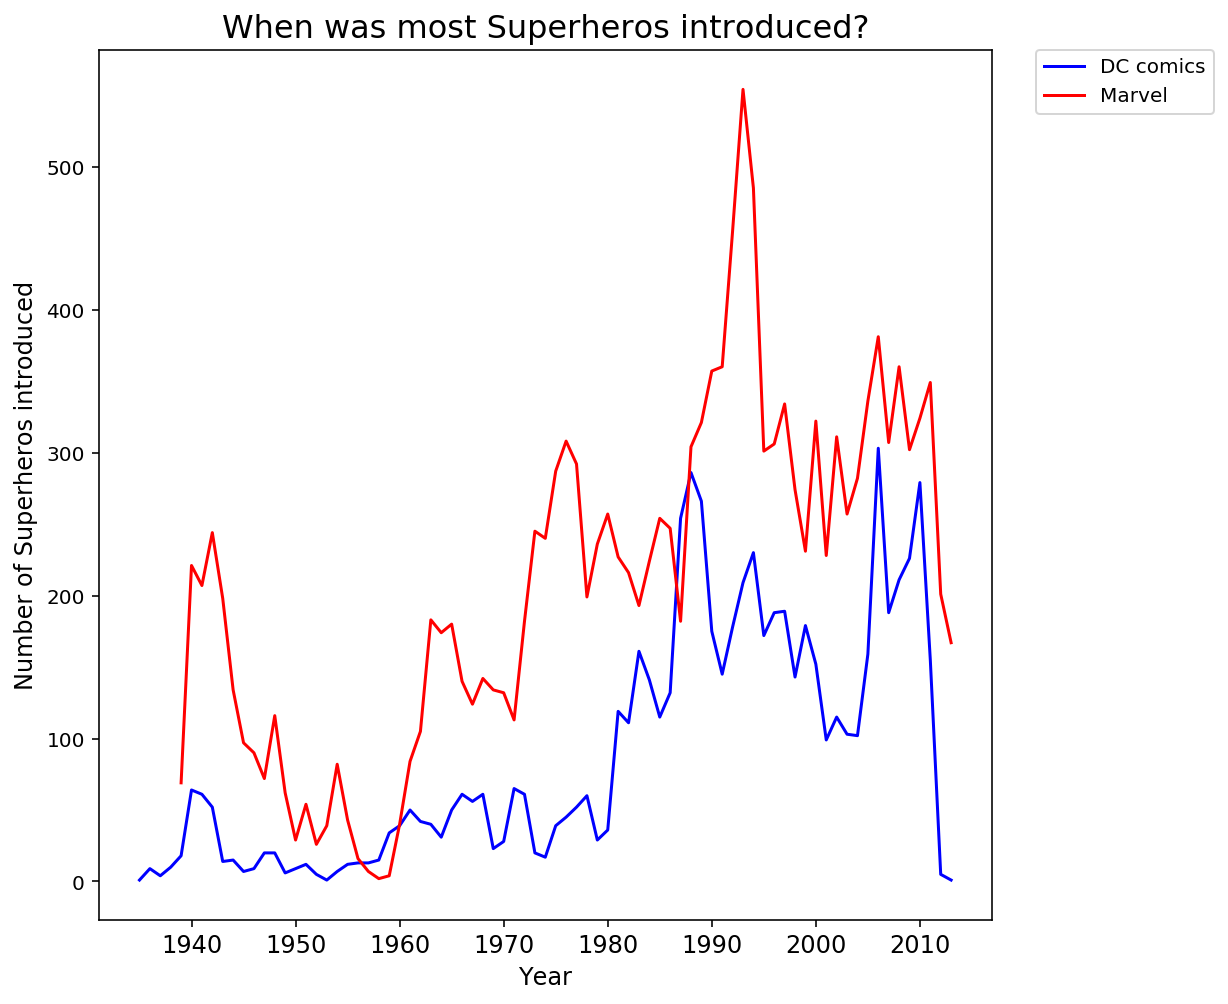

In [42]:
# make line chart
y1 = introduction1.YEAR.values
x1 = introduction1.index.values

y2 = introduction2.Year.values
x2 = introduction2.index.values

fig, ax = plt.subplots()
fig.set_size_inches(8, 8)

ax.plot(x1, y1, label="DC comics", color='b')
ax.plot(x2, y2, label="Marvel", color='r')

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('Year')
plt.ylabel('Number of Superheros introduced')
plt.title('When was most Superheros introduced?')

plt.rc('axes', titlesize=16)     
plt.rc('axes', labelsize=12)    
plt.rc('xtick', labelsize=12)   
plt.rc('figure', titlesize=12)  
 
plt.show();

**Number of Superheros DC**

In [43]:
dc_superdata.shape

(6896, 13)

*Number of superheros 6896*

**Number of Superheros Marvel**

In [44]:
marvel_superdata.shape

(16376, 13)

*Number of superheros 16376*

**Plot Number of Superheros**

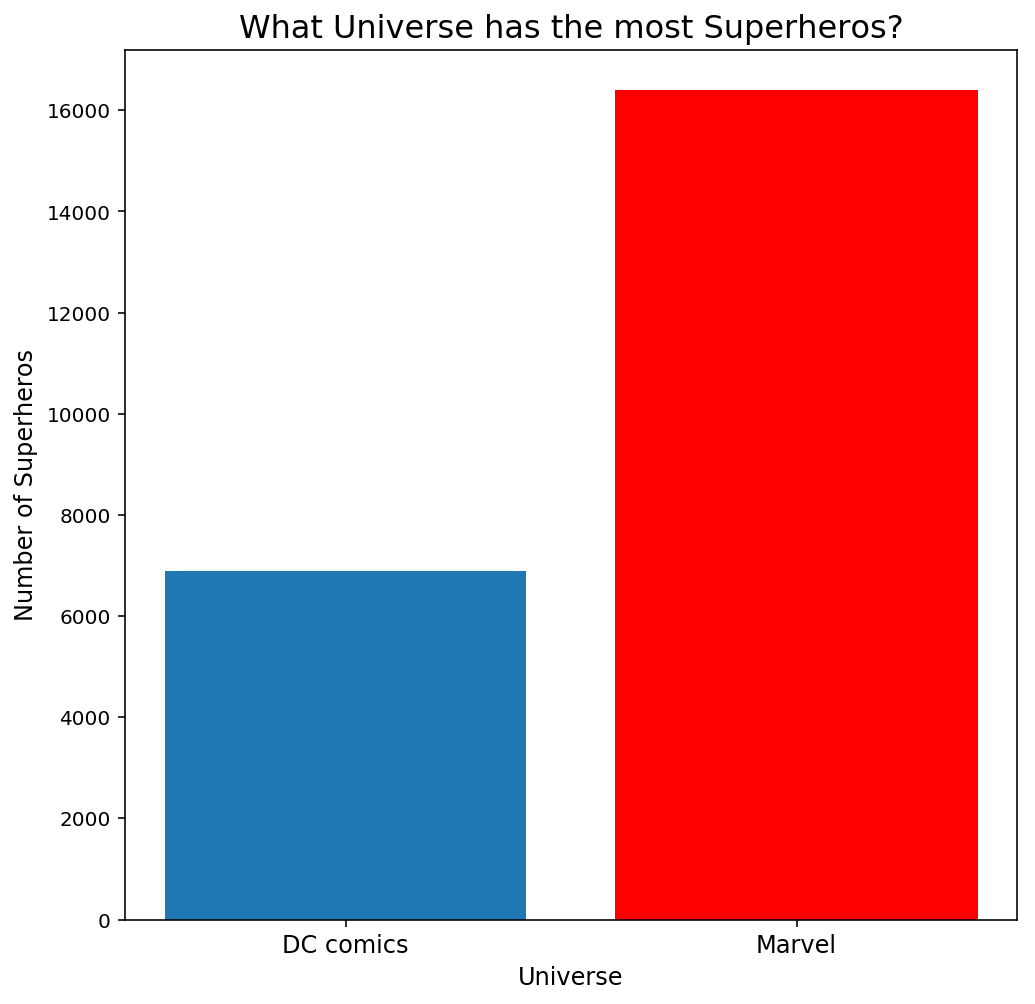

In [45]:
# Make a bar chart
universe = ('DC comics', 'Marvel')
y_pos = np.arange(len(universe))
nr_superheros = [6896,16376]
    
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)

barlist = ax.bar(y_pos, nr_superheros, align='center')
barlist[1].set_color('r')

plt.xticks(y_pos, universe)
plt.xlabel('Universe')
plt.ylabel('Number of Superheros')
plt.title('What Universe has the most Superheros?')

plt.rc('axes', titlesize=16)     
plt.rc('axes', labelsize=12)    
plt.rc('xtick', labelsize=12)   
plt.rc('figure', titlesize=12)  
 
plt.show()

**What kind of Identity DC**

In [46]:
dc_superdata['ID'].unique()

array(['Secret Identity', 'Public Identity', nan, 'Identity Unknown'],
      dtype=object)

In [47]:
# how many missing values
dc_superdata['ID'].isnull().sum()

2013

In [48]:
# exclude missing values from total number of superheros
a = len(dc_superdata)-dc_superdata['ID'].isnull().sum()

**Plot What kind of Identity DC**

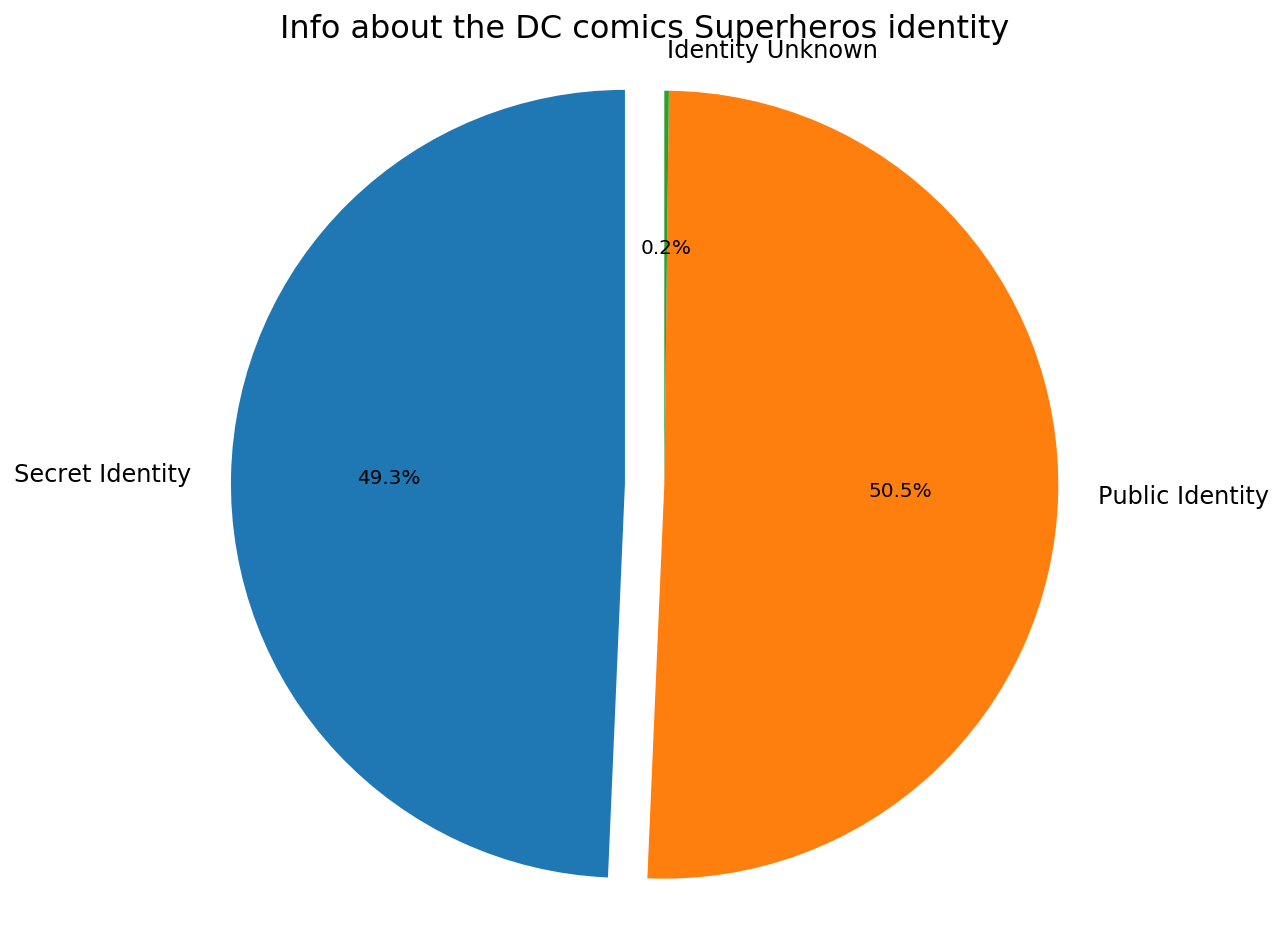

In [49]:
# Make a pie chart
labels = 'Secret Identity', 'Public Identity', 'Identity Unknown'
sizes = [(len(dc_superdata[dc_superdata['ID'] == 'Secret Identity'])/a),
         (len(dc_superdata[dc_superdata['ID'] == 'Public Identity'])/a), 
         (len(dc_superdata[dc_superdata['ID'] == 'Identity Unknown'])/a)]

explode = (0.1, 0, 0)  # explode the 1st slice (i.e. 'Secret Identity')

fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax.axis('equal')

plt.title('Info about the DC comics Superheros identity')

plt.rc('axes', titlesize=16)     
plt.rc('axes', labelsize=12)    
plt.rc('xtick', labelsize=12)   
plt.rc('figure', titlesize=12)  

plt.show()

**What kind of Identity Marvel**

In [50]:
marvel_superdata['ID'].unique()

array(['Secret Identity', 'Public Identity', 'No Dual Identity',
       'Known to Authorities Identity', nan], dtype=object)

In [51]:
# how many missing values
marvel_superdata['ID'].isnull().sum()

3770

In [52]:
# exclude missing values from total number of superheros
b = len(marvel_superdata)-marvel_superdata['ID'].isnull().sum()

**Plot What kind of Identity Marvel**

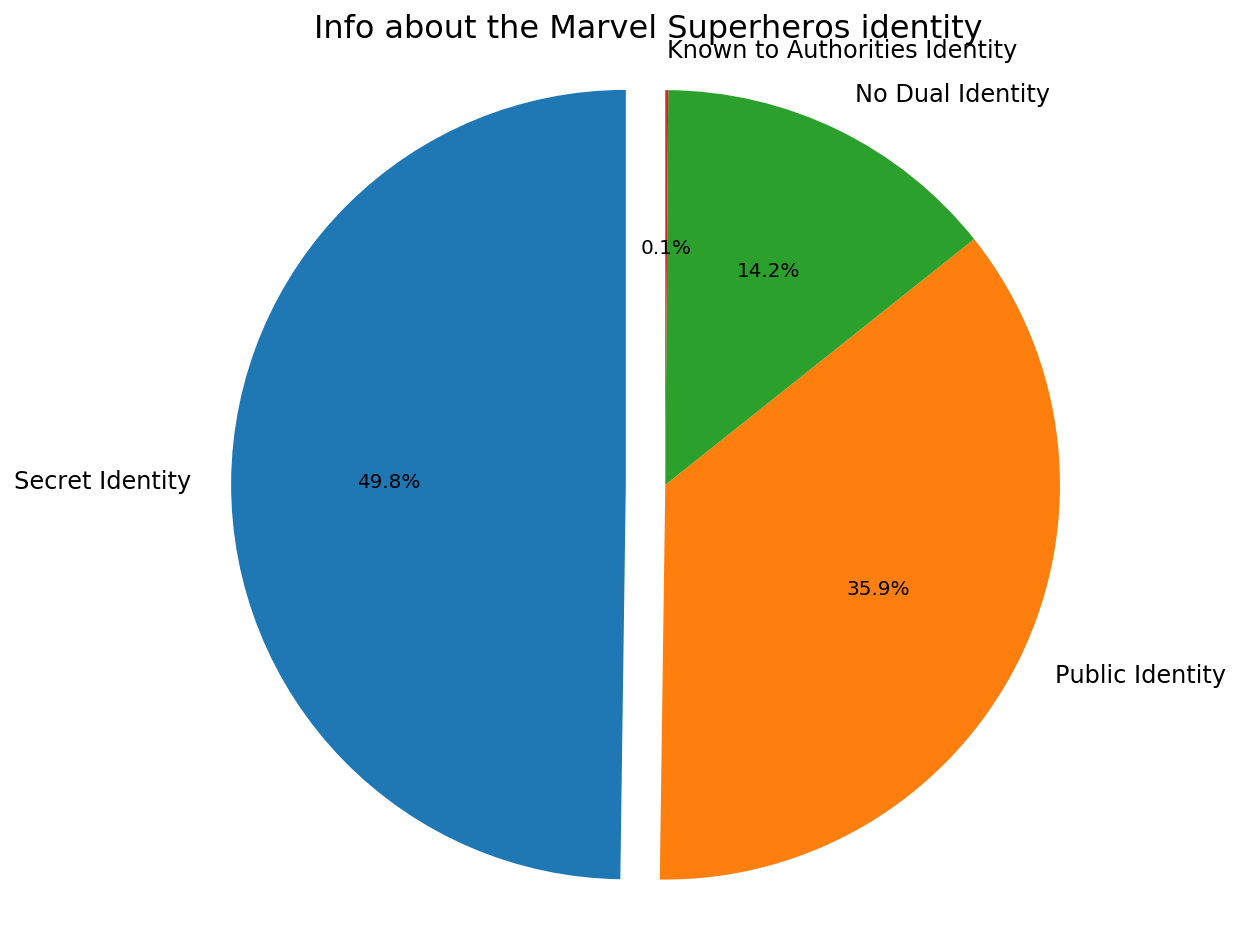

In [53]:
# Make a pie chart
labels = 'Secret Identity', 'Public Identity', 'No Dual Identity', 'Known to Authorities Identity'
sizes = [(len(marvel_superdata[marvel_superdata['ID'] == 'Secret Identity'])/b),
         (len(marvel_superdata[marvel_superdata['ID'] == 'Public Identity'])/b), 
         (len(marvel_superdata[marvel_superdata['ID'] == 'No Dual Identity'])/b), 
         (len(marvel_superdata[marvel_superdata['ID'] == 'Known to Authorities Identity'])/b)]
explode = (0.1, 0, 0, 0)  # explode the 1st slice (i.e. 'Secret Identity')

fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax.axis('equal')

plt.title('Info about the Marvel Superheros identity')

plt.rc('axes', titlesize=16)     
plt.rc('axes', labelsize=12)    
plt.rc('xtick', labelsize=12)   
plt.rc('figure', titlesize=12) 

plt.show()

**Good/Bad etc. character DC**

In [54]:
dc_superdata['ALIGN'].unique()

array(['Good Characters', 'Bad Characters', 'Neutral Characters', nan,
       'Reformed Criminals'], dtype=object)

In [55]:
# how many missing values
dc_superdata['ALIGN'].isnull().sum()

601

In [56]:
# exclude missing values from total number of superheros
c = len(dc_superdata)-dc_superdata['ALIGN'].isnull().sum()

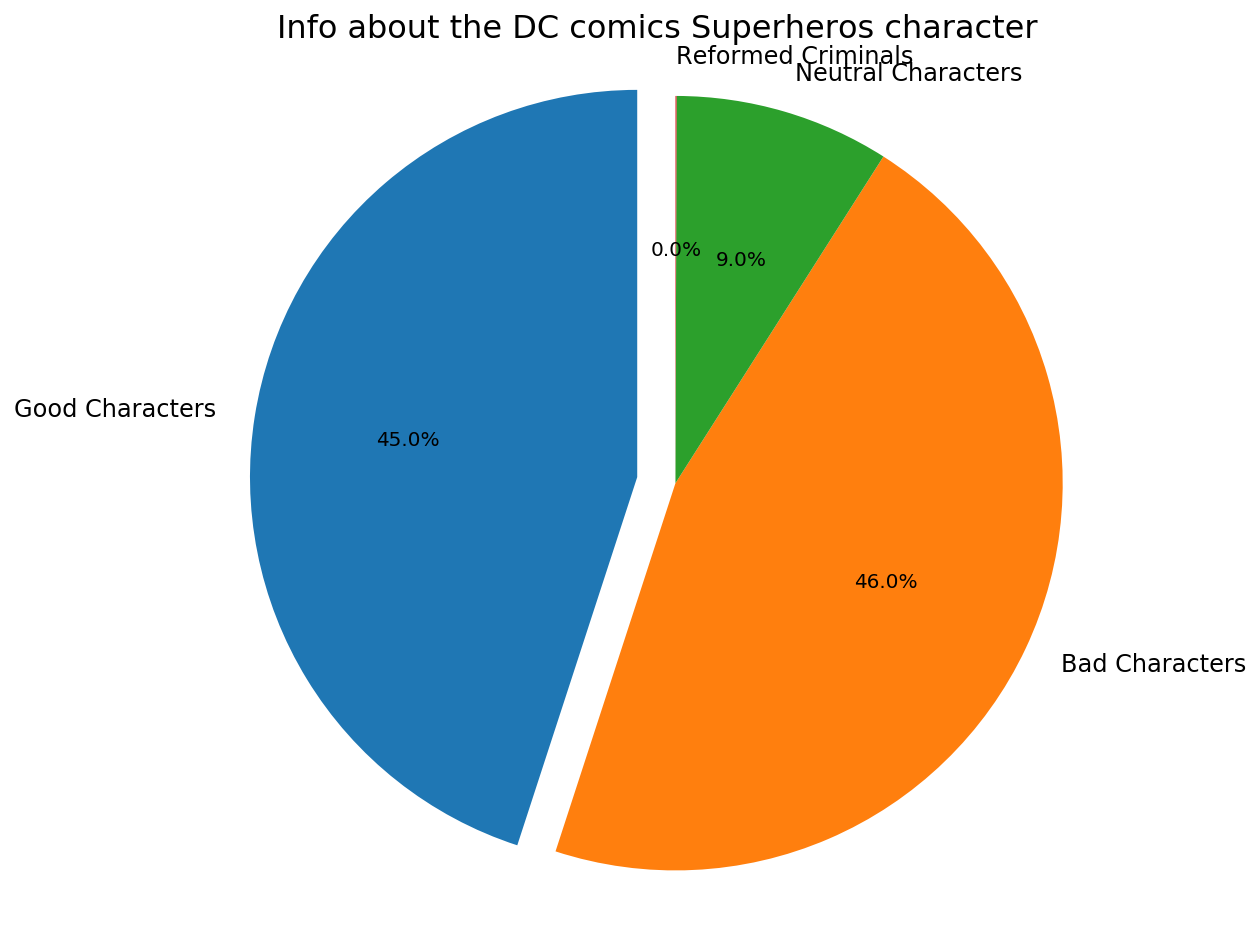

In [57]:
# Make a pie chart
labels = 'Good Characters', 'Bad Characters', 'Neutral Characters', 'Reformed Criminals'
sizes = [(len(dc_superdata[dc_superdata['ALIGN'] == 'Good Characters'])/c),
         (len(dc_superdata[dc_superdata['ALIGN'] == 'Bad Characters'])/c), 
         (len(dc_superdata[dc_superdata['ALIGN'] == 'Neutral Characters'])/c), 
         (len(dc_superdata[dc_superdata['ALIGN'] == 'Reformed Criminals'])/c)]
explode = (0.1, 0, 0, 0)  # explode the 1st slice (i.e. 'Good Characters')

fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax.axis('equal')

plt.title('Info about the DC comics Superheros character')

plt.rc('axes', titlesize=16)     
plt.rc('axes', labelsize=12)    
plt.rc('xtick', labelsize=12)   
plt.rc('figure', titlesize=12) 

plt.show()

**Good/Bad etc. character Marvel**

In [58]:
marvel_superdata['ALIGN'].unique()

array(['Good Characters', 'Neutral Characters', 'Bad Characters', nan],
      dtype=object)

In [59]:
# how many missing values
marvel_superdata['ALIGN'].isnull().sum()

2812

In [60]:
# exclude missing values from total number of superheros
d = len(marvel_superdata)-marvel_superdata['ALIGN'].isnull().sum()

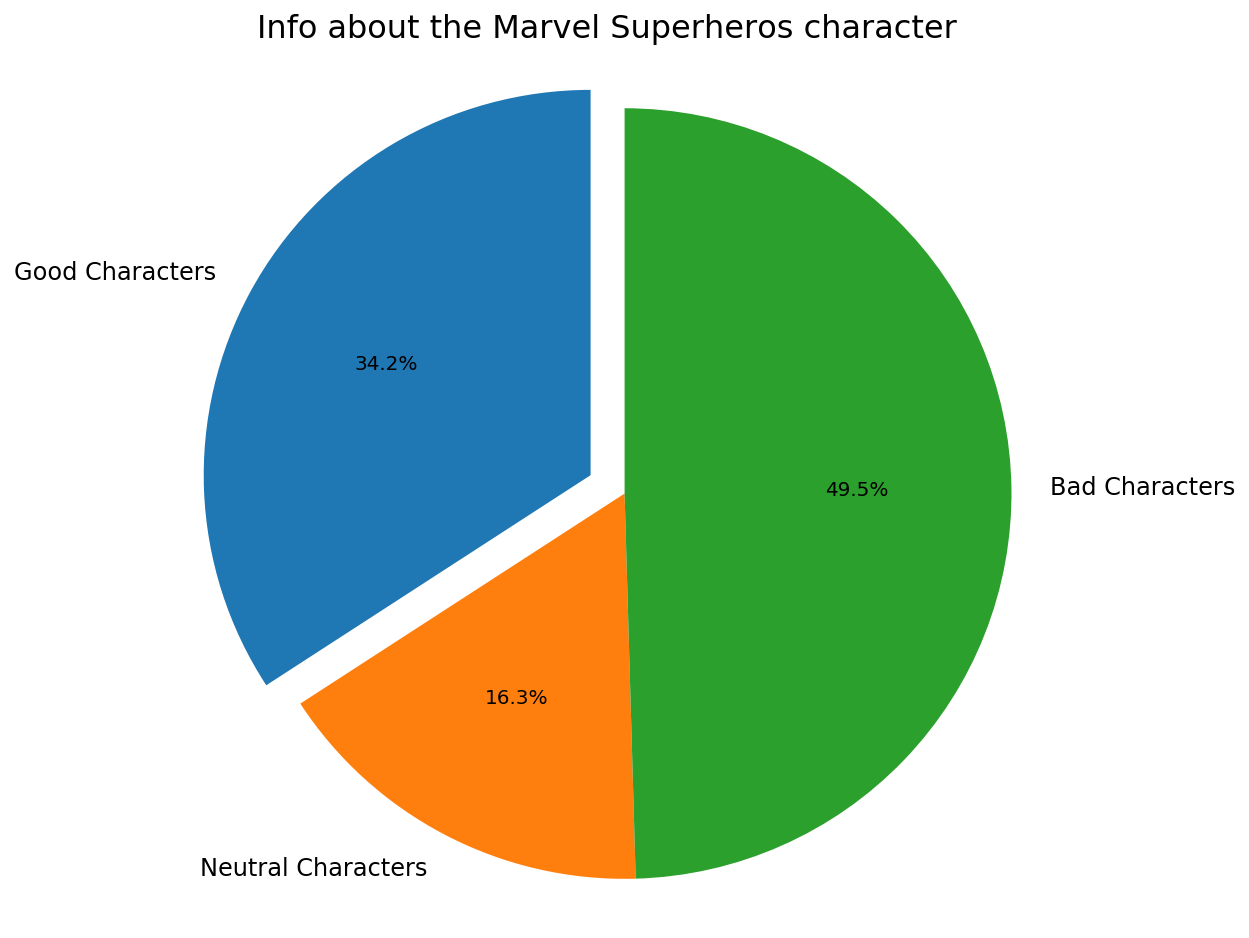

In [61]:
# Make a pie chart
labels = 'Good Characters', 'Neutral Characters', 'Bad Characters'
sizes = [(len(marvel_superdata[marvel_superdata['ALIGN'] == 'Good Characters'])/d),
         (len(marvel_superdata[marvel_superdata['ALIGN'] == 'Neutral Characters'])/d), 
         (len(marvel_superdata[marvel_superdata['ALIGN'] == 'Bad Characters'])/d)]
explode = (0.1, 0, 0)  # explode the 1st slice (i.e. 'Good Characters')

fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax.axis('equal')

plt.title('Info about the Marvel Superheros character')

plt.rc('axes', titlesize=16)     
plt.rc('axes', labelsize=12)    
plt.rc('xtick', labelsize=12)   
plt.rc('figure', titlesize=12) 

plt.show()

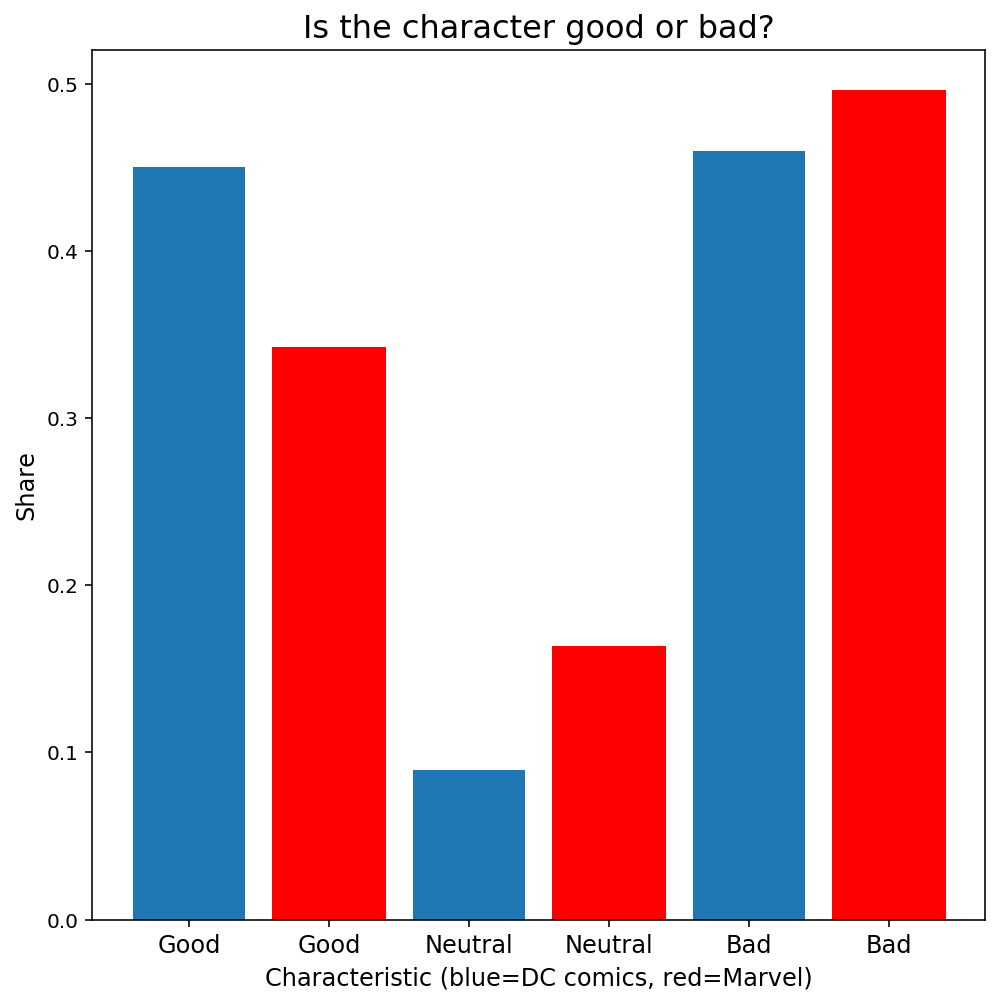

In [62]:
# Make a bar chart
character = ('Good', 'Good', 'Neutral', 'Neutral', 'Bad', 'Bad')
y_pos = np.arange(len(character))
type_character = [(len(dc_superdata[dc_superdata['ALIGN'] == 'Good Characters'])/c),
                 (len(marvel_superdata[marvel_superdata['ALIGN'] == 'Good Characters'])/d),
                 (len(dc_superdata[dc_superdata['ALIGN'] == 'Neutral Characters'])/c),
                 (len(marvel_superdata[marvel_superdata['ALIGN'] == 'Neutral Characters'])/d),
                 (len(dc_superdata[dc_superdata['ALIGN'] == 'Bad Characters'])/c),
                 (len(marvel_superdata[marvel_superdata['ALIGN'] == 'Bad Characters'])/d)]
    
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)

barlist = ax.bar(y_pos, type_character, align='center')
barlist[1].set_color('r')
barlist[3].set_color('r')
barlist[5].set_color('r')

plt.xticks(y_pos, character)
plt.xlabel('Characteristic (blue=DC comics, red=Marvel)')
plt.ylabel('Share')
plt.title('Is the character good or bad?')

plt.rc('axes', titlesize=16)     
plt.rc('axes', labelsize=12)    
plt.rc('xtick', labelsize=12)   
plt.rc('figure', titlesize=12)  
 
plt.show()

**What sex DC**

In [63]:
dc_superdata['SEX'].unique()

array(['Male Characters', 'Female Characters', nan,
       'Genderless Characters', 'Transgender Characters'], dtype=object)

Look only at ratio between male and female

In [64]:
# nr of male
e = len(dc_superdata[dc_superdata['SEX'] == 'Male Characters'])

In [65]:
# nr of female
f = len(dc_superdata[dc_superdata['SEX'] == 'Female Characters'])

In [66]:
total1 = e+f
total1

6750

In [67]:
#share per sex
male_dc = e/total1
female_dc = f/total1

**What sex DC**

In [68]:
marvel_superdata['SEX'].unique()

array(['Male Characters', 'Female Characters', 'Genderfluid Characters',
       'Agender Characters', nan], dtype=object)

Look only at ratio between male and female

In [69]:
# nr of male
g = len(marvel_superdata[marvel_superdata['SEX'] == 'Male Characters'])

In [70]:
# nr of female
h = len(marvel_superdata[marvel_superdata['SEX'] == 'Female Characters'])

In [71]:
total2 = g+h
total2

15475

In [72]:
#share per sex
male_marvel = g/total2
female_marvel = h/total2

**Make a bar chart for what sex**

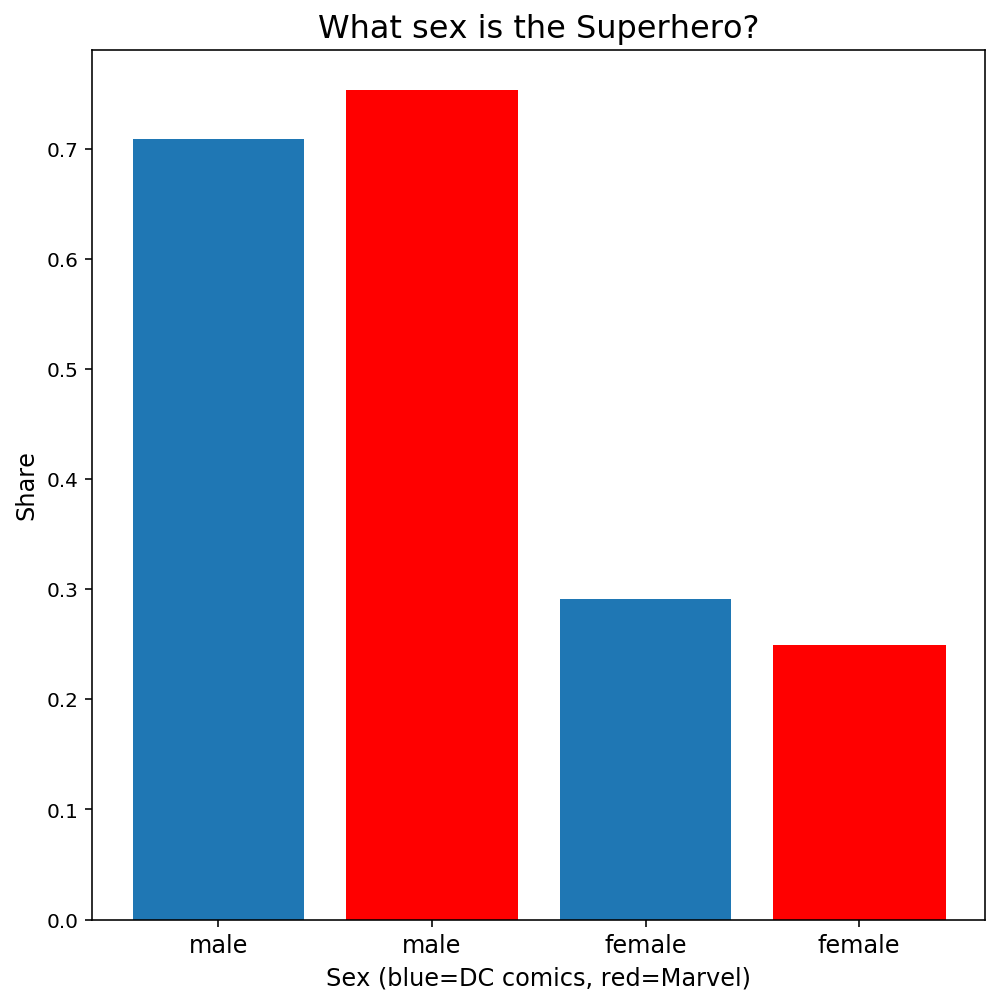

In [73]:
# Make a bar chart
sex = ('male', 'male', 'female', 'female')
y_pos = np.arange(len(sex))
sex_superheros = [male_dc, male_marvel, female_dc, female_marvel]
    
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)

barlist = ax.bar(y_pos, sex_superheros, align='center')
barlist[1].set_color('r')
barlist[3].set_color('r')

plt.xticks(y_pos, sex)
plt.xlabel('Sex (blue=DC comics, red=Marvel)')
plt.ylabel('Share')
plt.title('What sex is the Superhero?')

plt.rc('axes', titlesize=16)     
plt.rc('axes', labelsize=12)    
plt.rc('xtick', labelsize=12)   
plt.rc('figure', titlesize=12)  
 
plt.show()

**Appearances DC**

In [74]:
dc_superdata.sort_values('APPEARANCES', axis=0, ascending=False).head(10)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0
5,1448,Wonder Woman (Diana Prince),\/wiki\/Wonder_Woman_(Diana_Prince),Public Identity,Good Characters,Blue Eyes,Black Hair,Female Characters,NaN,Living Characters,1231.0,"1941, December",1941.0
6,1486,Aquaman (Arthur Curry),\/wiki\/Aquaman_(Arthur_Curry),Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,1121.0,"1941, November",1941.0
7,1451,Timothy Drake (New Earth),\/wiki\/Timothy_Drake_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1095.0,"1989, August",1989.0
8,71760,Dinah Laurel Lance (New Earth),\/wiki\/Dinah_Laurel_Lance_(New_Earth),Public Identity,Good Characters,Blue Eyes,Blond Hair,Female Characters,NaN,Living Characters,1075.0,"1969, November",1969.0
9,1380,Flash (Barry Allen),\/wiki\/Flash_(Barry_Allen),Secret Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,1028.0,"1956, October",1956.0


**Appearances Marvel**

In [75]:
marvel_superdata.sort_values('APPEARANCES', axis=0, ascending=False).head(10)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0
5,2458,Benjamin Grimm (Earth-616),\/Benjamin_Grimm_(Earth-616),Public Identity,Good Characters,Blue Eyes,No Hair,Male Characters,NaN,Living Characters,2255.0,Nov-61,1961.0
6,2166,Reed Richards (Earth-616),\/Reed_Richards_(Earth-616),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,2072.0,Nov-61,1961.0
7,1833,Hulk (Robert Bruce Banner),\/Hulk_(Robert_Bruce_Banner),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,2017.0,May-62,1962.0
8,29481,Scott Summers (Earth-616),\/Scott_Summers_(Earth-616),Public Identity,Neutral Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1955.0,Sep-63,1963.0
9,1837,Jonathan Storm (Earth-616),\/Jonathan_Storm_(Earth-616),Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,1934.0,Nov-61,1961.0


Have noticed that there are some characters that has the wrong name in the data (they have there real names instraf of there superhero names)<BR />
Benjamin Grimm  = The Thing<BR />
Reed Richards = Mister Fantastic<BR />
I have changed that manually for the plot

**Make bar chart over the 10 characters that appear the most**

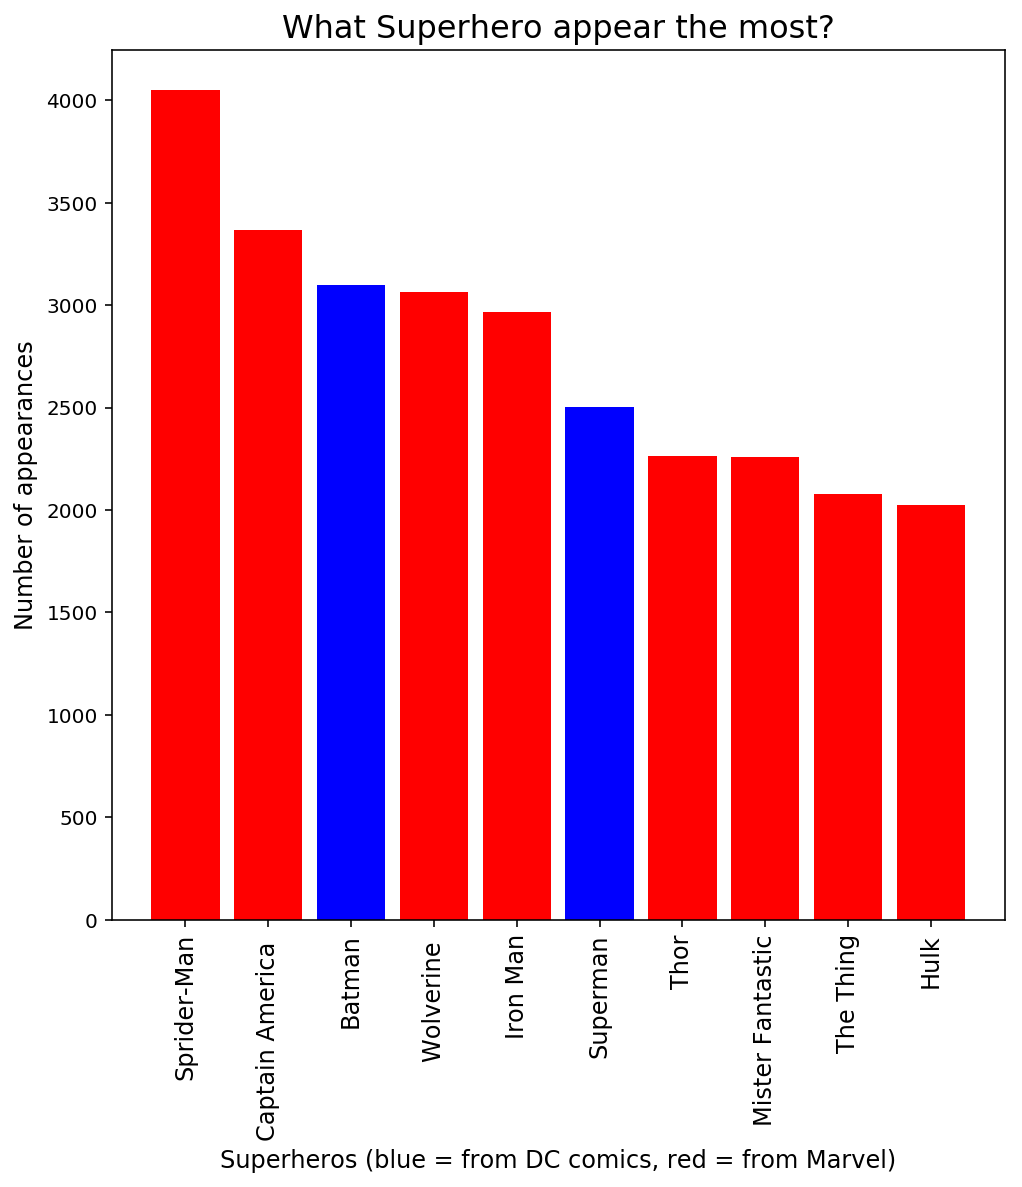

In [76]:
# Make a bar chart
character = ('Sprider-Man', 'Captain America ', 'Batman', 'Wolverine ', 'Iron Man', 'Superman', 'Thor', 'Mister Fantastic', 'The Thing', 'Hulk')
y_pos = np.arange(len(character))
nr_app = [4043, 3360, 3093, 3061, 2961, 2496, 2258, 2255, 2072, 2017]
    
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)

barlist = ax.bar(y_pos, nr_app, align='center')
barlist[0].set_color('r')
barlist[1].set_color('r')
barlist[2].set_color('b')
barlist[3].set_color('r')
barlist[4].set_color('r')
barlist[5].set_color('b')
barlist[6].set_color('r')
barlist[7].set_color('r')
barlist[8].set_color('r')
barlist[9].set_color('r')

plt.xticks(y_pos, character)
plt.xticks(rotation=90)
plt.xlabel('Superheros (blue = from DC comics, red = from Marvel)')
plt.ylabel('Number of appearances')
plt.title('What Superhero appear the most?')

plt.rc('axes', titlesize=16)     
plt.rc('axes', labelsize=12)    
plt.rc('xtick', labelsize=12)   
plt.rc('figure', titlesize=12)  
 
plt.show()

**Alive DC**

In [77]:
dc_superdata['ALIVE'].value_counts()

Living Characters      5200
Deceased Characters    1693
Name: ALIVE, dtype: int64

In [78]:
i = len(dc_superdata[dc_superdata['ALIVE'] == 'Living Characters'])

In [79]:
j = len(dc_superdata[dc_superdata['ALIVE'] == 'Deceased Characters'])

In [80]:
dc_superdata['ALIVE'].isnull().sum()

3

In [81]:
# alive
i/(len(dc_superdata['ALIVE'])-3)

0.7543885100826926

In [82]:
# dead
j/(len(dc_superdata['ALIVE'])-3)

0.2456114899173074

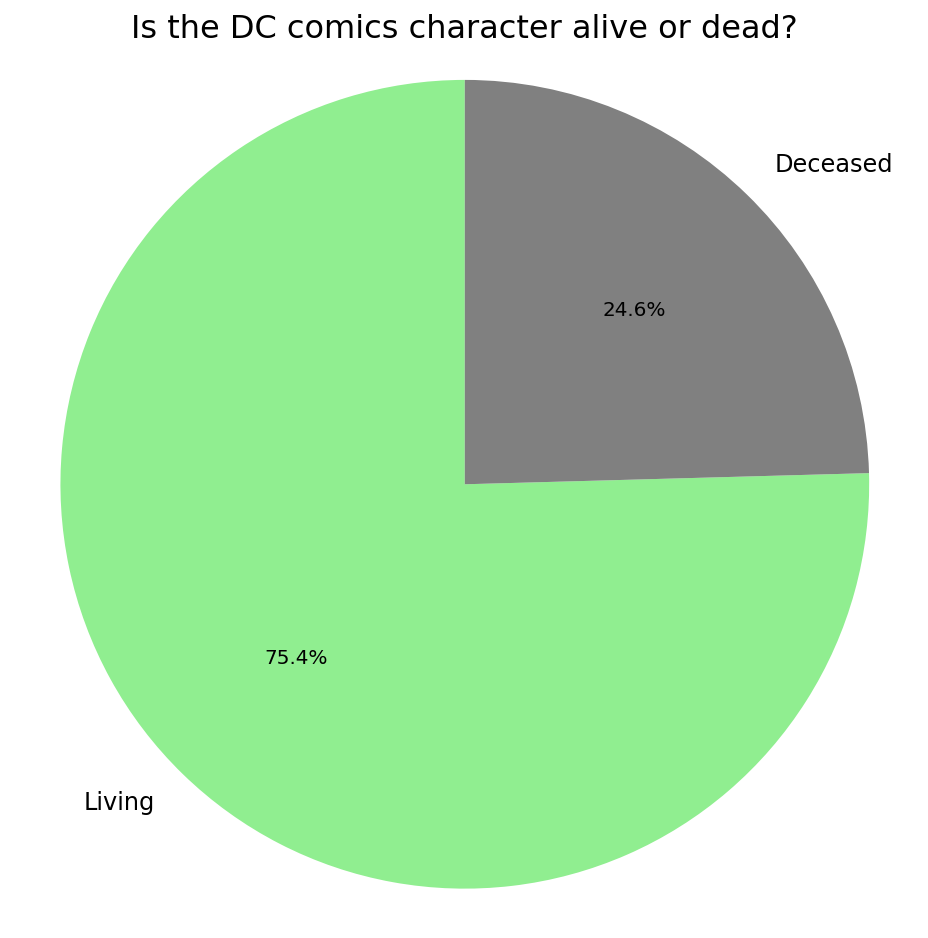

In [83]:
# Make a pie chart
labels = 'Living', 'Deceased'
sizes = [(i/(len(dc_superdata['ALIVE'])-3)),
         (j/(len(dc_superdata['ALIVE'])-3))]
colors = ['lightgreen', 'grey']

fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
ax.pie(sizes, explode=None, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors)
ax.axis('equal')

plt.title('Is the DC comics character alive or dead?')

plt.rc('axes', titlesize=16)     
plt.rc('axes', labelsize=12)    
plt.rc('xtick', labelsize=12)   
plt.rc('figure', titlesize=12) 

plt.show()

**Alive Marvel**

In [84]:
marvel_superdata['ALIVE'].value_counts()

Living Characters      12608
Deceased Characters     3765
Name: ALIVE, dtype: int64

In [85]:
marvel_superdata['ALIVE'].isnull().sum()

3

In [86]:
k = len(marvel_superdata[marvel_superdata['ALIVE'] == 'Living Characters'])

In [87]:
l = len(marvel_superdata[marvel_superdata['ALIVE'] == 'Deceased Characters'])

In [88]:
# alive
k/(len(marvel_superdata['ALIVE'])-3)

0.7700482501679594

In [89]:
# alive
l/(len(marvel_superdata['ALIVE'])-3)

0.22995174983204056

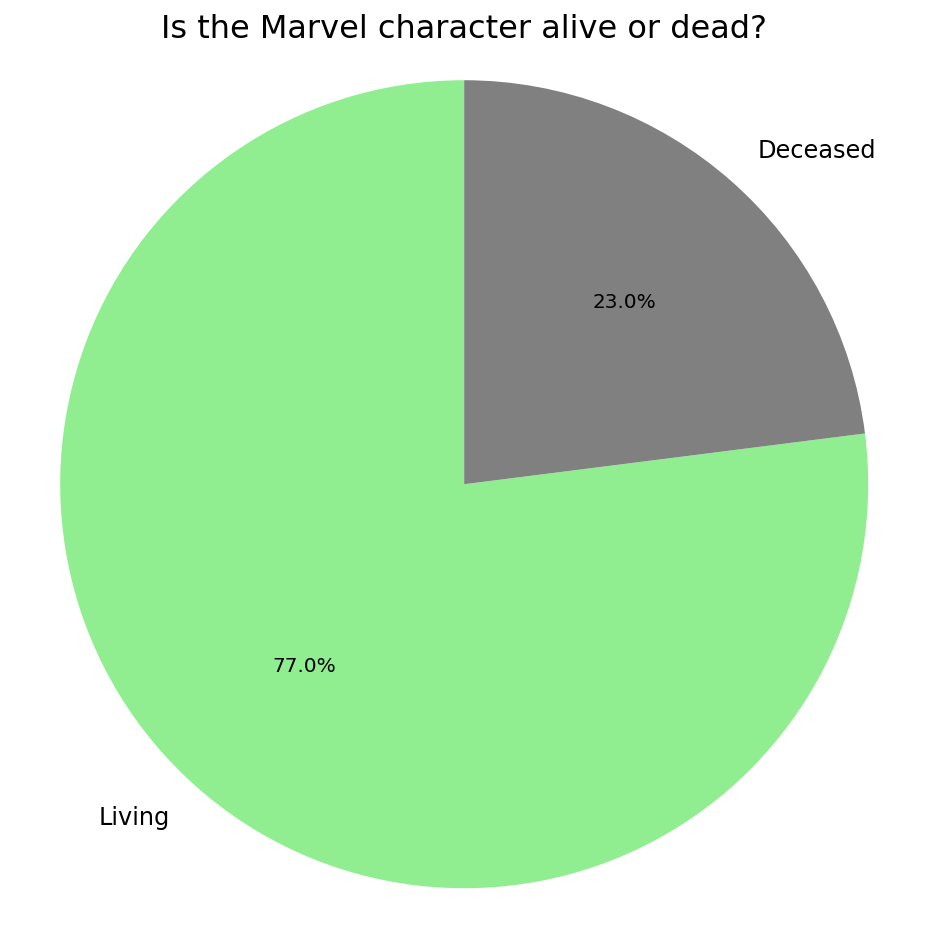

In [90]:
# Make a pie chart
labels = 'Living', 'Deceased'
sizes = [(k/(len(marvel_superdata['ALIVE'])-3)),
         (l/(len(marvel_superdata['ALIVE'])-3))]
colors = ['lightgreen', 'grey']

fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
ax.pie(sizes, explode=None, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors)
ax.axis('equal')

plt.title('Is the Marvel character alive or dead?')

plt.rc('axes', titlesize=16)     
plt.rc('axes', labelsize=12)    
plt.rc('xtick', labelsize=12)   
plt.rc('figure', titlesize=12) 

plt.show()

**DC - are superheros with blond hair and blue eyes more likely to be bad or good characters**

In [91]:
dc_superdata['EYE'].unique()

array(['Blue Eyes', 'Brown Eyes', 'Green Eyes', 'Purple Eyes',
       'Black Eyes', 'White Eyes', 'Red Eyes', 'Photocellular Eyes',
       'Hazel Eyes', 'Amber Eyes', 'Yellow Eyes', nan, 'Grey Eyes',
       'Pink Eyes', 'Violet Eyes', 'Gold Eyes', 'Orange Eyes',
       'Auburn Hair'], dtype=object)

In [92]:
dc_superdata['HAIR'].unique()

array(['Black Hair', 'Brown Hair', 'White Hair', 'Blond Hair', 'Red Hair',
       nan, 'Green Hair', 'Strawberry Blond Hair', 'Grey Hair',
       'Silver Hair', 'Orange Hair', 'Purple Hair', 'Gold Hair',
       'Blue Hair', 'Reddish Brown Hair', 'Pink Hair', 'Violet Hair',
       'Platinum Blond Hair'], dtype=object)

In [93]:
dc_superdata['ALIGN'].unique()

array(['Good Characters', 'Bad Characters', 'Neutral Characters', nan,
       'Reformed Criminals'], dtype=object)

In [94]:
blue_blond = dc_superdata[(dc_superdata['EYE']=='Blue Eyes') & (dc_superdata['HAIR']=='Blond Hair')]

In [95]:
blue_blond['ALIGN'].value_counts()

Good Characters       179
Bad Characters         94
Neutral Characters     36
Reformed Criminals      1
Name: ALIGN, dtype: int64

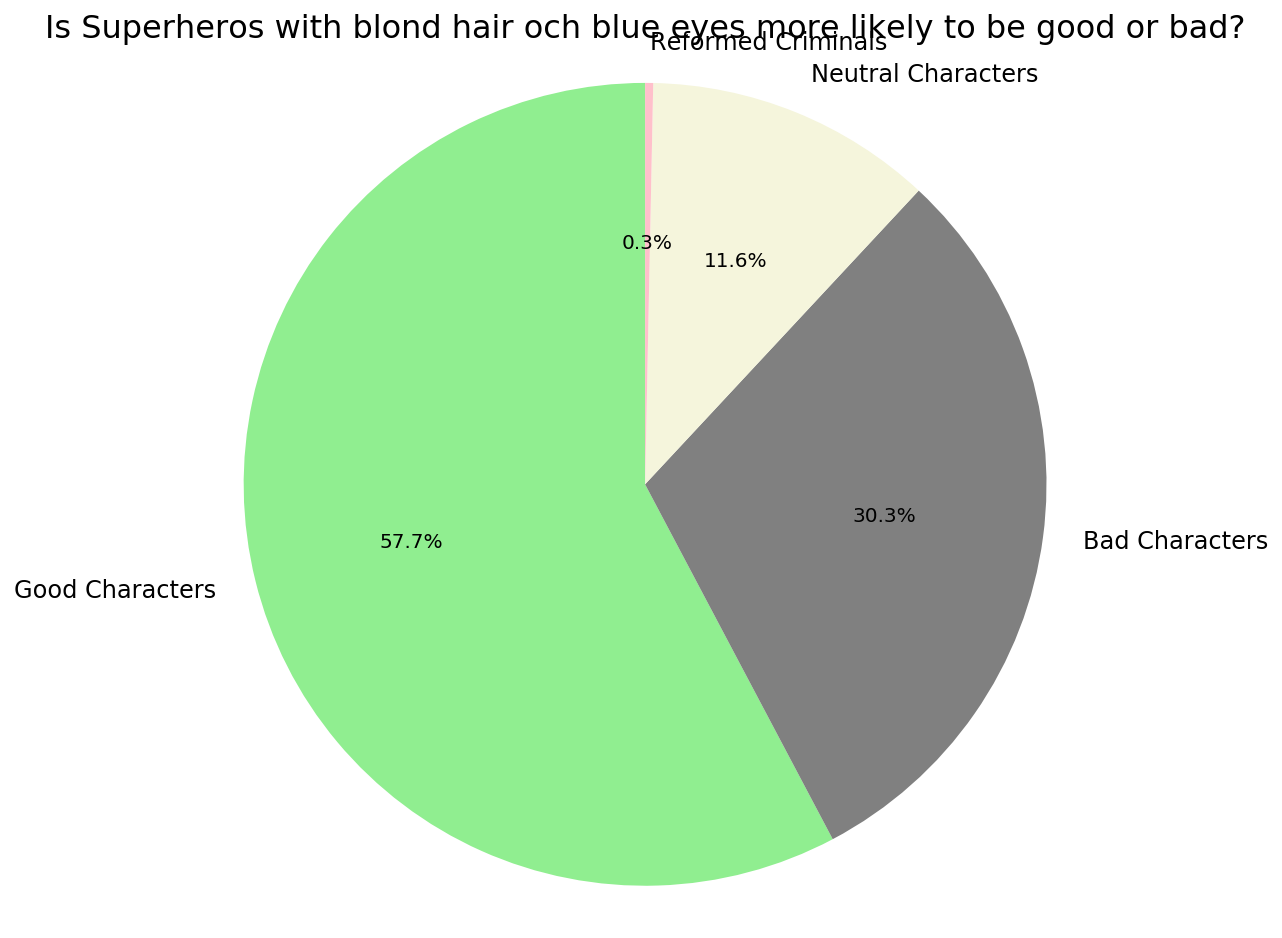

In [96]:
# Make a pie chart
labels = 'Good Characters', 'Bad Characters','Neutral Characters','Reformed Criminals '
sizes = [179,94,36,1]
colors = ['lightgreen', 'grey', 'beige', 'pink']

fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
ax.pie(sizes, explode=None, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors)
ax.axis('equal')

plt.title('Is Superheros with blond hair och blue eyes more likely to be good or bad?')

plt.rc('axes', titlesize=16)     
plt.rc('axes', labelsize=12)    
plt.rc('xtick', labelsize=12)   
plt.rc('figure', titlesize=12) 

plt.show()

**Marvel - does alive female superheros tend to be bad or good characters?**

In [97]:
marvel_superdata['ALIVE'].unique()

array(['Living Characters', 'Deceased Characters', nan], dtype=object)

In [98]:
marvel_superdata['SEX'].unique()

array(['Male Characters', 'Female Characters', 'Genderfluid Characters',
       'Agender Characters', nan], dtype=object)

In [99]:
marvel_superdata['ALIGN'].unique()

array(['Good Characters', 'Neutral Characters', 'Bad Characters', nan],
      dtype=object)

In [100]:
alive_female = marvel_superdata[(marvel_superdata['ALIVE']=='Living Characters') 
                                & (dc_superdata['SEX']=='Female Characters')]

In [101]:
alive_female['ALIGN'].value_counts()

Good Characters       569
Bad Characters        499
Neutral Characters    210
Name: ALIGN, dtype: int64

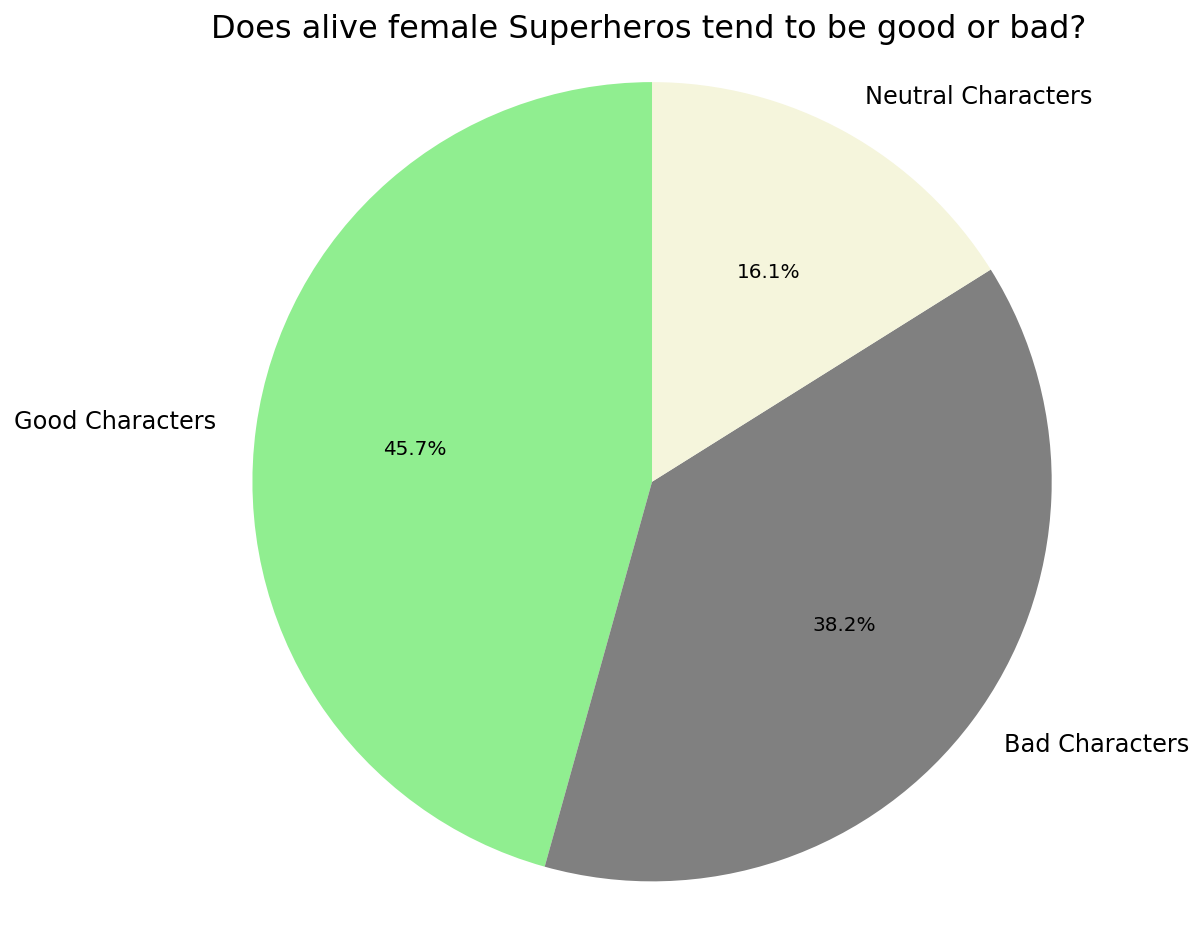

In [102]:
# Make a pie chart
labels = 'Good Characters', 'Bad Characters','Neutral Characters'
sizes = [596,499,210]
colors = ['lightgreen', 'grey', 'beige']

fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
ax.pie(sizes, explode=None, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors)
ax.axis('equal')

plt.title('Does alive female Superheros tend to be good or bad?')

plt.rc('axes', titlesize=16)     
plt.rc('axes', labelsize=12)    
plt.rc('xtick', labelsize=12)   
plt.rc('figure', titlesize=12) 

plt.show()

### Concluding remarks

- Both data sets have missing data. For this occation it was not a problem.
- A DC comics superhero appeared before a Marvel superhero. The years were 1935 and 1939.
- Marvel have introduced more superheros than DC comics (there are more superheros in the Marvel universe)
- DC comics introduced the most characters in 2006 (a number of 303)
- Marvel introduced most characters in 1993 (a number of 554)
- In the Marvel universe a majority of the superheros have a secret identity, but in the DC comics universe there are more superheros with a public identity than a secret identity.
- Both DC comics and Marvel have a majority of superheros that are bad characters. (Marvel have a bigger share of bad characters than DC comics.)
- Both DC comics and Marvel have a majority of superheros that are male characters. (DC comics have a bigger share of female characters than Marvel.)
- Out of the top 10 superheros that appear the most 8 out of 10 are from the Marvel universe. The most frequently appearing superhero is Spider-Man. (2 names were wrong in the list and changed from their real name to their superhero name.)
- DC comics is better at keeping there superheros alive than Marvel. In the DC comics universe 75% are alive and 25% are deceased. In the Marvel universe 77% are alive and 23% are deceased. 
- In the DC comics universe 58% of the superheros with blue eyes and blond hair are good (30% are bad).
- In the Marvel universe 46% of the female superheros that are alive are good (38% are bad).

There are a lot of more things that can be explored in the 2 datasets. I might revisit the sets in the future.